In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [3]:
df = pd.read_csv("/kaggle/input/student-grade-prediction/student-mat.csv") 
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

# Preprocessing

In [5]:
df['pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)

X = df.drop(['G1', 'G2', 'G3', 'pass'], axis=1)
y = df['pass']

In [6]:
X.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,1,1,3,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,1,1,3,4
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,2,3,3,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,1,1,5,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,1,2,5,4


In [7]:
X = pd.get_dummies(X, drop_first=True)

In [8]:
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


# Train-test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)

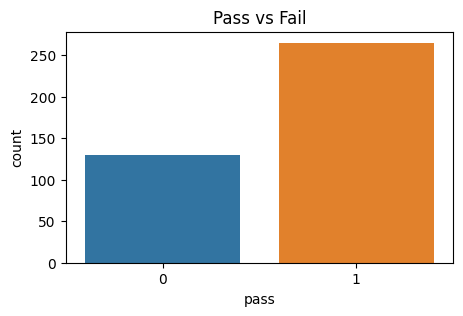

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x=y)
plt.title("Pass vs Fail")
plt.show()

# Correlation heatmap

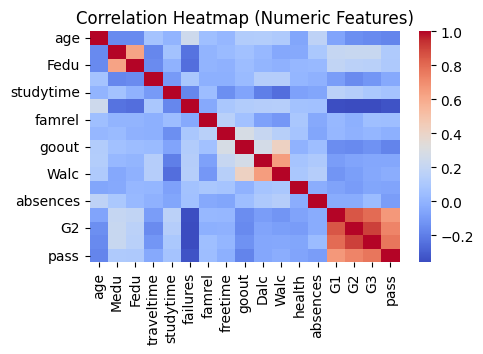

In [15]:
plt.figure(figsize=(5,3))

numeric_df = df.select_dtypes(include=['int64','float64'])

sns.heatmap(numeric_df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


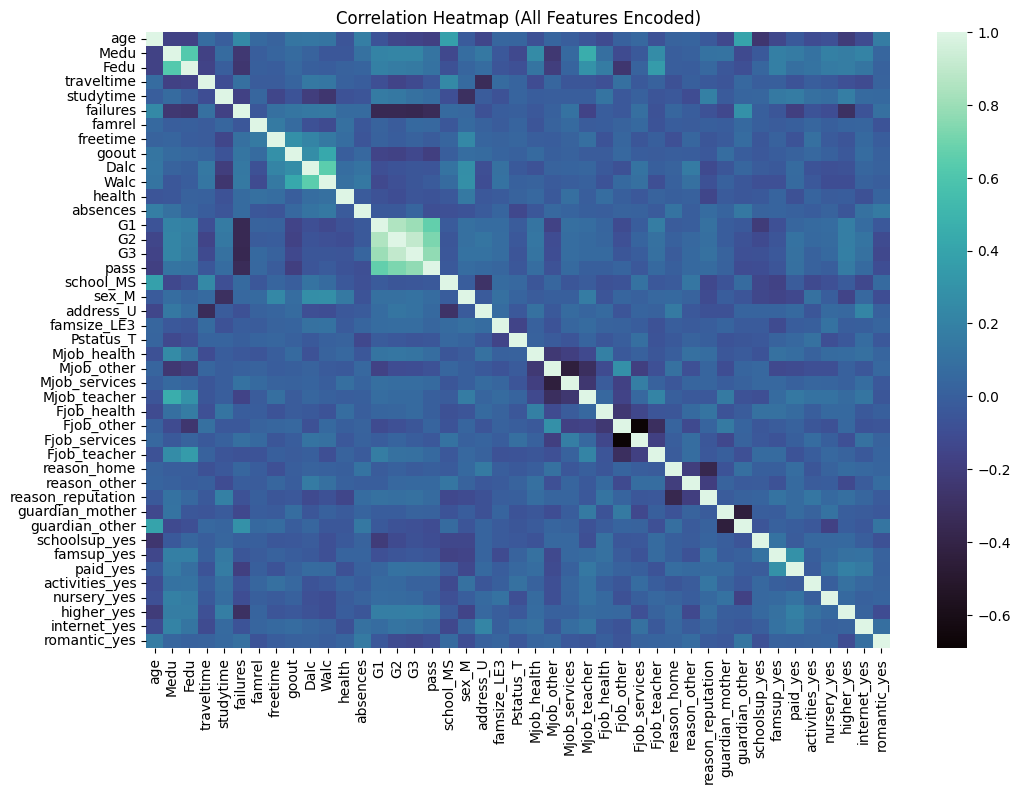

In [23]:
# Encode categorical columns into dummy variables
encoded_df = pd.get_dummies(df, drop_first=True)

plt.figure(figsize=(12,8))
sns.heatmap(encoded_df.corr(), cmap="mako", annot=False)
plt.title("Correlation Heatmap (All Features Encoded)")
plt.show()


# Study time vs Pass/Fail

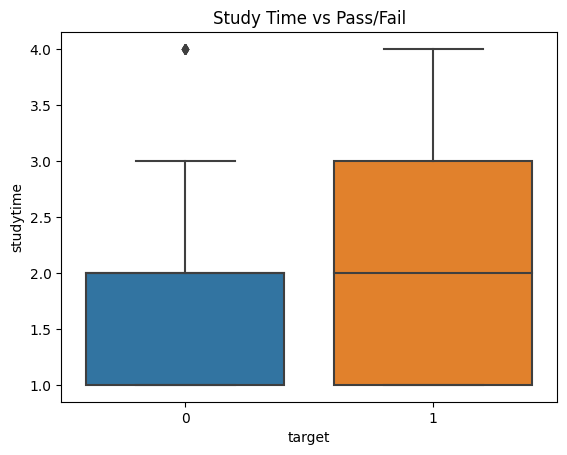

In [25]:
sns.boxplot(x='target', y='studytime', data=df.assign(target=y))
plt.title("Study Time vs Pass/Fail")
plt.show()

# Define Models

In [26]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(),
    "Naive Bayes": GaussianNB()
}

# Train & Evaluate


Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.61      0.41      0.49        27
           1       0.74      0.87      0.80        52

    accuracy                           0.71        79
   macro avg       0.67      0.64      0.64        79
weighted avg       0.69      0.71      0.69        79



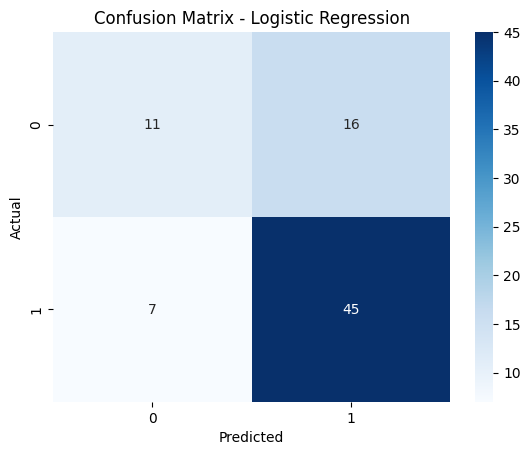


KNN Performance:
              precision    recall  f1-score   support

           0       0.36      0.15      0.21        27
           1       0.66      0.87      0.75        52

    accuracy                           0.62        79
   macro avg       0.51      0.51      0.48        79
weighted avg       0.56      0.62      0.57        79



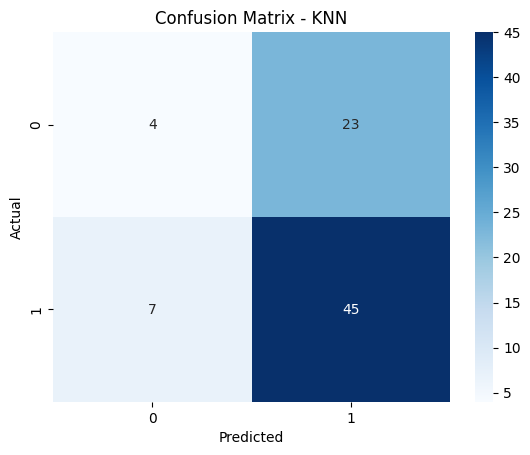


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.47      0.33      0.39        27
           1       0.70      0.81      0.75        52

    accuracy                           0.65        79
   macro avg       0.59      0.57      0.57        79
weighted avg       0.62      0.65      0.63        79



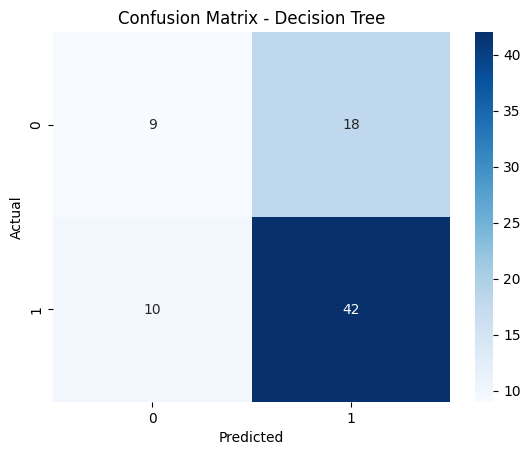


SVM Performance:
              precision    recall  f1-score   support

           0       0.62      0.19      0.29        27
           1       0.69      0.94      0.80        52

    accuracy                           0.68        79
   macro avg       0.66      0.56      0.54        79
weighted avg       0.67      0.68      0.62        79



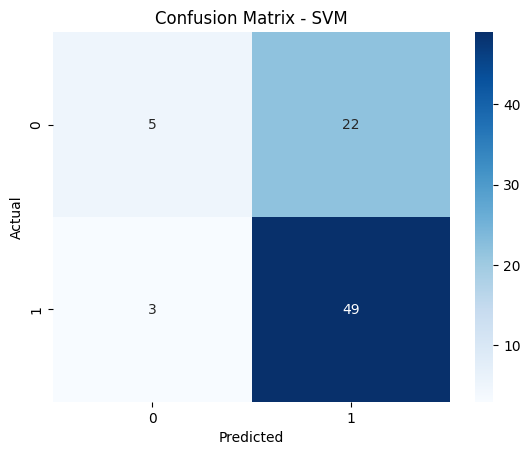


Naive Bayes Performance:
              precision    recall  f1-score   support

           0       0.59      0.37      0.45        27
           1       0.73      0.87      0.79        52

    accuracy                           0.70        79
   macro avg       0.66      0.62      0.62        79
weighted avg       0.68      0.70      0.68        79



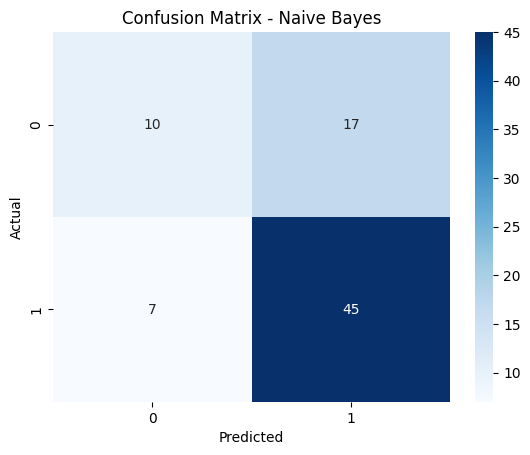

In [27]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results[name] = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1-score": f1}
    
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Compare Models

                     Accuracy  Precision    Recall  F1-score
Logistic Regression  0.708861   0.737705  0.865385  0.796460
KNN                  0.620253   0.661765  0.865385  0.750000
Decision Tree        0.645570   0.700000  0.807692  0.750000
SVM                  0.683544   0.690141  0.942308  0.796748
Naive Bayes          0.696203   0.725806  0.865385  0.789474


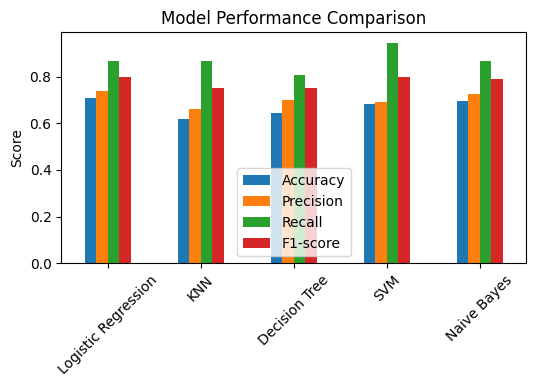

In [31]:
results_df = pd.DataFrame(results).T
print(results_df)

results_df.plot(kind='bar', figsize=(6,3))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


The best model will depend on dataset patterns:


* If features are linearly separable, Logistic Regression or SVM works best.
* If data has complex rules, Decision Tree may outperform.

We can confirm by comparing the F1-scores in results_df.


# Hyperparameter Tuning

In [32]:
param_grid = {'n_neighbors': range(1,21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best K:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)

Best K: {'n_neighbors': 13}
Best Accuracy: 0.7151289682539683
